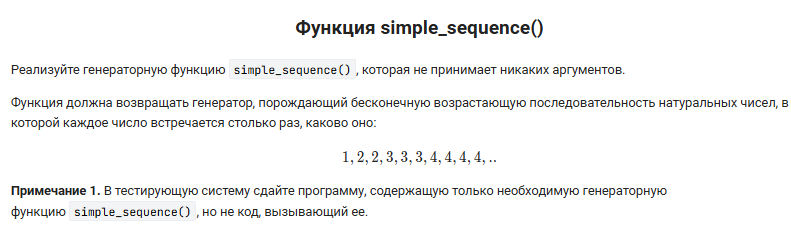

In [5]:
def simple_sequence():
    count = 1
    num = 1
    while True:
        if num - count != 0:
            count += 1
            res = num
        else:
            res = num
            num += 1
            count = 1
        yield res

generator = simple_sequence()
numbers = [next(generator) for _ in range(10)]

print(*numbers)

1 2 2 3 3 3 4 4 4 4


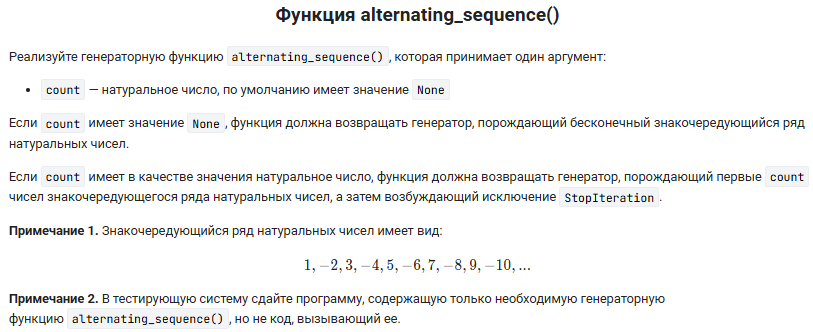

In [15]:
def alternating_sequence(count=None):
    num = 0
    multiplier = -1
    if count == None:
        while True:
            num += 1
            multiplier = multiplier * (-1)
            yield num * multiplier
    else:
        while num < count:
            num += 1
            multiplier = multiplier * (-1)
            yield num * multiplier


        

generator = alternating_sequence(10)

print(*generator)




1 -2 3 -4 5 -6 7 -8 9 -10


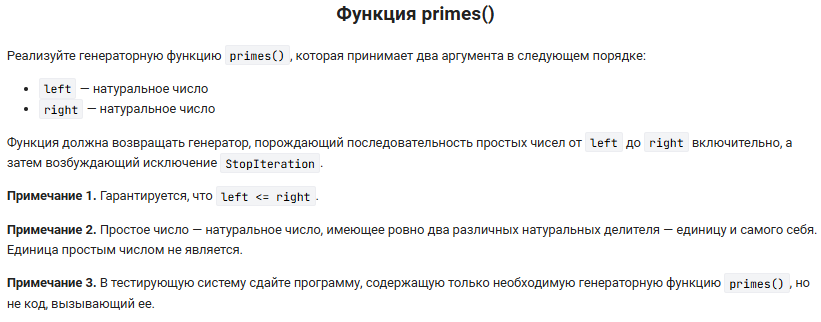

In [4]:
def primes(left,right):
    for num in range(left,right + 1):
        if num > 1:
            for i in range(2, int(num ** 0.5) + 1):
                if num % i == 0:
                    break
            else:
                yield num
    
generator = primes(6, 36)

print(next(generator))
print(next(generator))

7
11


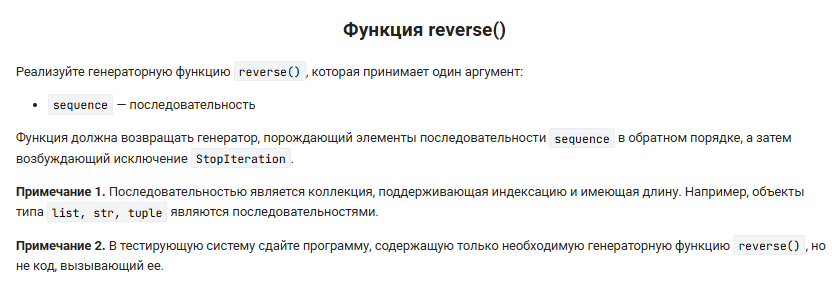

In [6]:
def reverse(sequence):
    for i in sequence[::-1]:
        yield i

print(*reverse([1, 2, 3, 4, 5]))

5 4 3 2 1


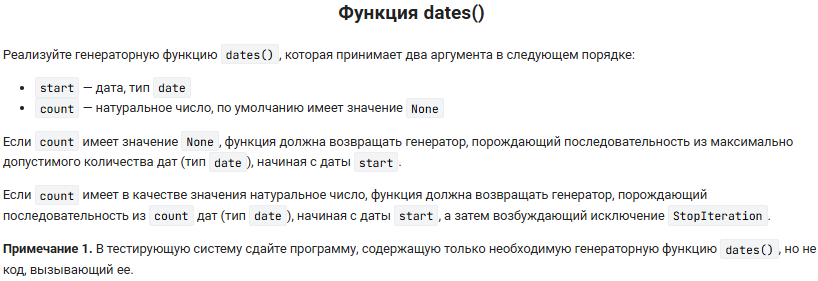

In [9]:
from datetime import date, timedelta

def dates(start,count=None):
    current = start
    try:
        if count is None:
            while True:
                yield current
                current += timedelta(days=1)
        else:
            for _ in range(count):
                yield current
                current += timedelta(days=1)
    except:
        return

generator = dates(date(9999, 1, 7))

for _ in range(348):
    next(generator)

print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

try:
   print(next(generator))
except StopIteration:
    print('Error')

9999-12-21
9999-12-22
9999-12-23
9999-12-24
9999-12-25
9999-12-26
9999-12-27
9999-12-28
9999-12-29
9999-12-30
9999-12-31
Error


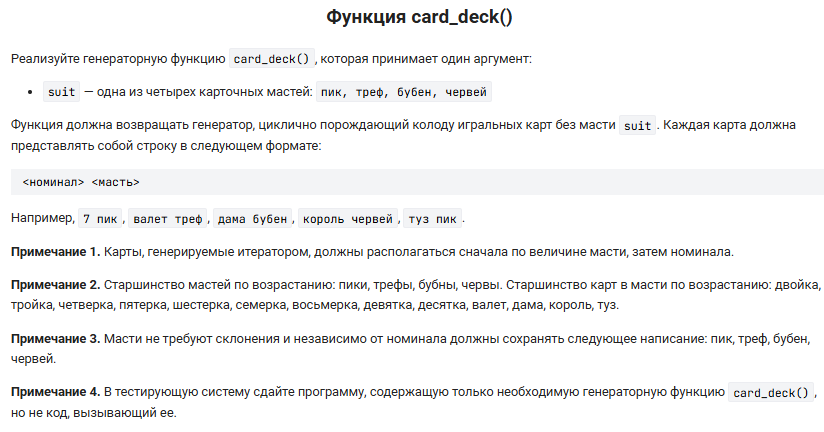

In [13]:
def card_deck(my_mast):
    masti = ("пик", "треф", "бубен", "червей")
    numbers = ("2", "3", "4", "5", "6", "7", "8", "9", "10", "валет", "дама", "король", "туз")
    while True:
        for mast in masti:
            for num in numbers:
                if mast == my_mast:
                    continue
                else:
                    yield f'{num} {mast}'

generator = card_deck('пик')

print(next(generator))
print(next(generator))
print(next(generator))


2 треф
3 треф
4 треф


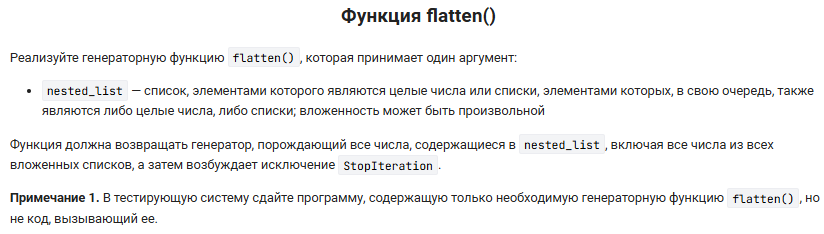

In [23]:
def flatten(nested_list):
    for nest in nested_list:
        if isinstance(nest, list):
            yield from flatten(nest)
        else:
            yield nest

generator = flatten([[1, 2], [[3]], [[4], 5]])

print(*generator)

1 2 3 4 5


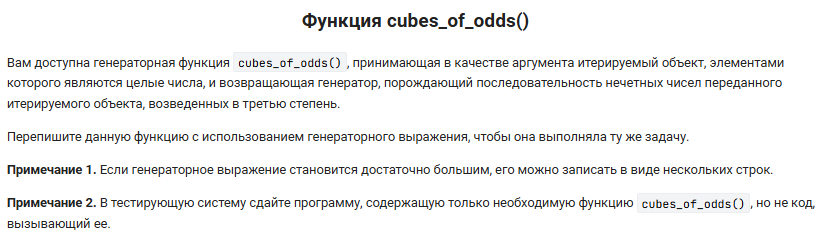

In [25]:
def cubes_of_odds(iter):
    return (i ** 3 for i in iter if i % 2 != 0)

print(*cubes_of_odds([1, 2, 3, 4, 5]))

1 27 125


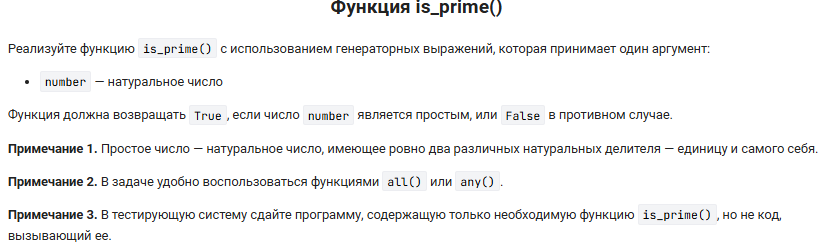

In [ ]:
# def is_prime(number):
#     for n in range(2,10):
#         if n == number:
#             continue
#         if number == 1:
#             return False
#         elif number % n == 0:
#             return False
#         continue
#     return True
def is_prime(number):
    if number != 1:
        return all(number % i for i in range(2,number))
    return False
    
print(is_prime(1061))

False


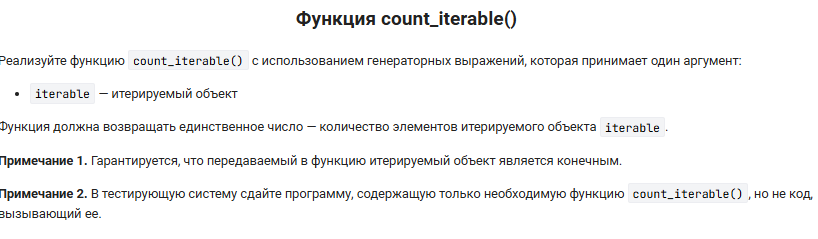

In [17]:
def count_iterable(iterable):
    return sum(1 for i in iterable)

print(count_iterable([1, 2, 3, 4, 5]))

5


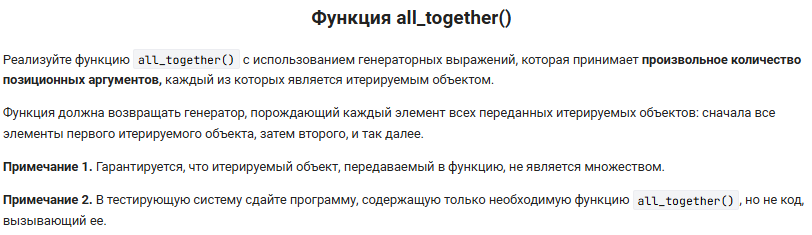

In [23]:
def all_together(*args):
    return (iter 
            for iterable in args
              for iter in iterable)
# def all_together(*args):
#     res = []
#     for iterable in args:
#         for iter in iterable:
#             res.append(iter)


objects = [range(3), 'bee', [1, 3, 5], (2, 4, 6)]

print(*all_together(*objects))

0 1 2 b e e 1 3 5 2 4 6


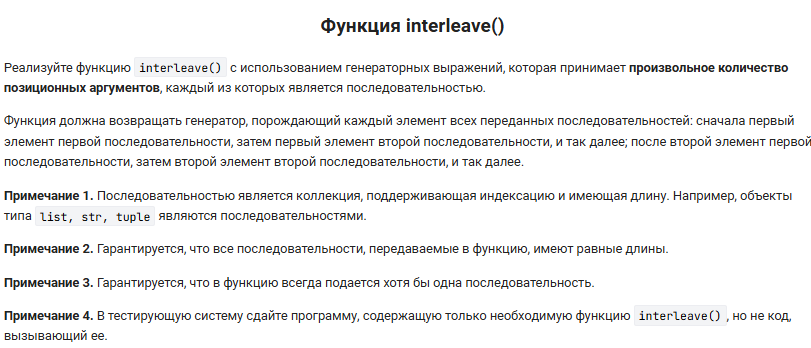

In [26]:
def interleave(*args):
    return (i
             for iter in zip(*args)
                for i in iter)

print(*interleave('bee', '123'))

b 1 e 2 e 3


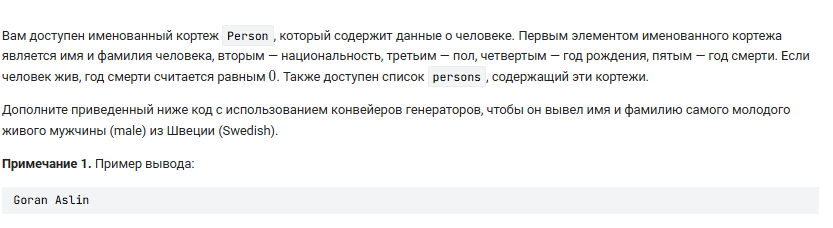

In [5]:
from collections import namedtuple

Person = namedtuple('Person', ['name', 'nationality', 'sex', 'birth', 'death'])

persons = [Person('E. M. Ashe', 'American', 'male', 1867, 1941),
           Person('Goran Aslin', 'Swedish', 'male', 1980, 0),
           Person('Erik Gunnar Asplund', 'Swedish', 'male', 1885, 1940),
           Person('Genevieve Asse', 'French', 'female', 1949, 0),
           Person('Irene Adler', 'Swedish', 'female', 2005, 0),
           Person('Sergio Asti', 'Italian', 'male', 1926, 0),
           Person('Olof Backman', 'Swedish', 'male', 1999, 0),
           Person('Alyson Hannigan', 'Swedish', 'female', 1940, 1987),
           Person('Dana Atchley', 'American', 'female', 1941, 2000),
           Person('Monika Andersson', 'Swedish', 'female', 1957, 0),
           Person('Shura_Stone', 'Russian', 'male', 2000, 0),
           Person('Jon Bale', 'Swedish', 'male', 2000, 0)]
yound_swedish = (p for p in persons if (p.sex == 'male') & (p.death == 0) & (p.nationality == 'Swedish'))
youngest = max(yound_swedish,key=lambda x:x.birth)
print(youngest.name)

Jon Bale


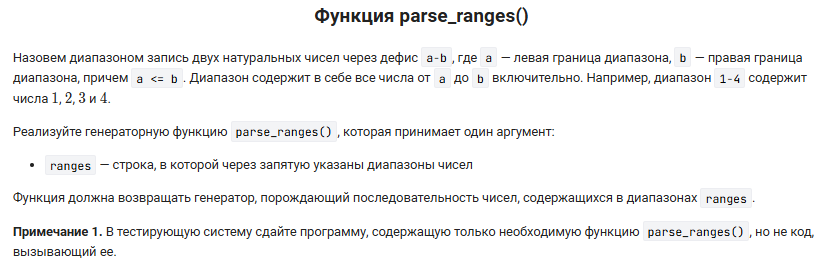

In [41]:
def parse_ranges(ranges):
    parse_one = (r for r in ranges.split(','))
    parse_two = (r.split('-') for r in parse_one)
    partse_three = ((int(r[0]),int(r[1])) for r in parse_two )
    ran = (range(r[0],r[1] + 1) for r in partse_three)
    res = (num for r in ran
            for num in r)
    return res

print(*parse_ranges('1-2,4-4,8-10'))

1 2 4 8 9 10


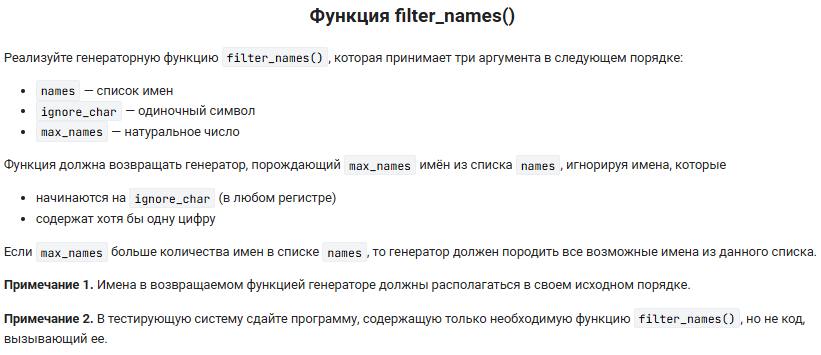

In [11]:
def filter_names(names,ignore_char,max_names):
    without_ignore = (name for name in names if not(name.lower().startswith(ignore_char.lower())))
    without_nums = (name for name in without_ignore if all(not(char.isdigit()) for char in name))
    only_max_names_tuple = filter(lambda x: x[0] <= max_names,enumerate(without_nums,1))
    only_max_names = map(lambda x: x[1],only_max_names_tuple)
    return only_max_names

data = ['Dima', 'Timur', 'Arthur', 'Anri20', 'Arina', 'German', 'Ruslan']

print(*filter_names(data, 't', 20))

Dima Arthur Arina German Ruslan


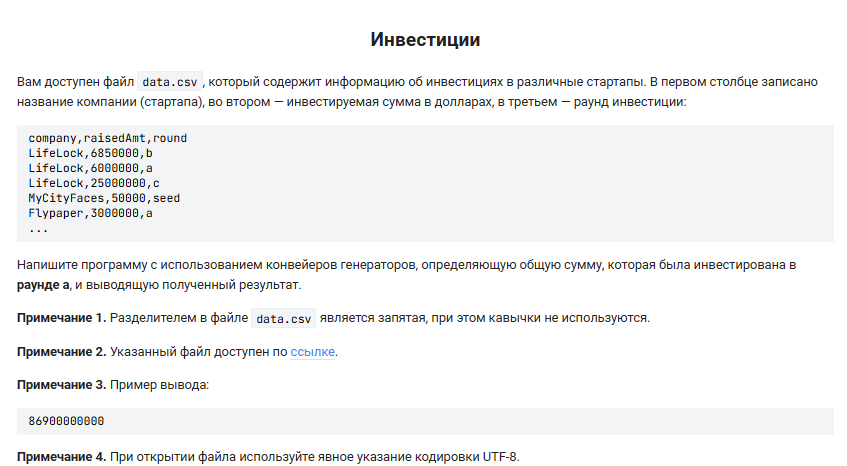

In [20]:
with open('data.csv',encoding='utf-8') as file:
    res = 0
    file_lines = (line for line in file) #Создаем итератор чтения строк
    line_values = (line.rstrip().split(',') for line in file_lines) #Создаем итератор делящий строку на значения
    file_headers = next(line_values) #Первые значения - колонки
    line_dicts = (dict(zip(file_headers, data)) for data in line_values) #Создаем словарь с колонками и значениями
    round_a_only = (int(note['raisedAmt']) for note in line_dicts if note['round'] == 'a')
    print(sum(round_a_only))


4380015000


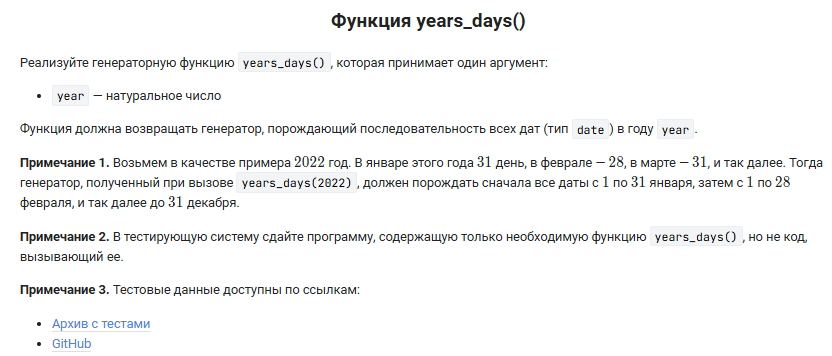

In [41]:
from datetime import datetime
from datetime import timedelta

def years_days(year):
    this_date = datetime(year=year,month=1,day=1)
    delta = timedelta(days=1)
    yield this_date.strftime('%Y-%m-%d')
    while not((this_date.month == 12) and (this_date.day == 31)):
        this_date = this_date + delta
        yield this_date.strftime('%Y-%m-%d')

# TEST_2:
dates = years_days(2077)

print(*dates)



2077-01-01 2077-01-02 2077-01-03 2077-01-04 2077-01-05 2077-01-06 2077-01-07 2077-01-08 2077-01-09 2077-01-10 2077-01-11 2077-01-12 2077-01-13 2077-01-14 2077-01-15 2077-01-16 2077-01-17 2077-01-18 2077-01-19 2077-01-20 2077-01-21 2077-01-22 2077-01-23 2077-01-24 2077-01-25 2077-01-26 2077-01-27 2077-01-28 2077-01-29 2077-01-30 2077-01-31 2077-02-01 2077-02-02 2077-02-03 2077-02-04 2077-02-05 2077-02-06 2077-02-07 2077-02-08 2077-02-09 2077-02-10 2077-02-11 2077-02-12 2077-02-13 2077-02-14 2077-02-15 2077-02-16 2077-02-17 2077-02-18 2077-02-19 2077-02-20 2077-02-21 2077-02-22 2077-02-23 2077-02-24 2077-02-25 2077-02-26 2077-02-27 2077-02-28 2077-03-01 2077-03-02 2077-03-03 2077-03-04 2077-03-05 2077-03-06 2077-03-07 2077-03-08 2077-03-09 2077-03-10 2077-03-11 2077-03-12 2077-03-13 2077-03-14 2077-03-15 2077-03-16 2077-03-17 2077-03-18 2077-03-19 2077-03-20 2077-03-21 2077-03-22 2077-03-23 2077-03-24 2077-03-25 2077-03-26 2077-03-27 2077-03-28 2077-03-29 2077-03-30 2077-03-31 2077-04-01

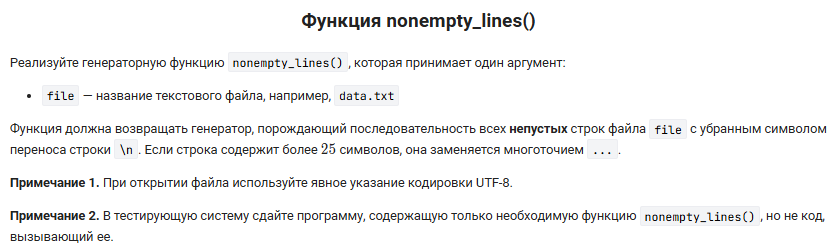

In [48]:
def nonempty_lines(file):
    with open(file=file,mode='r',encoding='utf-8') as file:
        for line in file:
            line = line.rstrip('\n')
            if line != '' and len(line) <= 25:
                yield line
            elif line != '' and len(line) > 25:
                yield '...'

print(*nonempty_lines('data.txt'))

short line another short line ... end of file
